In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd 
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from hyperparameter_tuning import *

/Users/jordan/anaconda3/envs/challengeQRT/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
X_data_team_home=pd.read_csv('Train_Data/train_home_team_statistics_df.csv',index_col='ID')
X_data_team_home_test=pd.read_csv('Test_Data/test_home_team_statistics_df.csv',index_col='ID')

In [3]:
def calculate_nan_percentage(dataframe):
    # Count the number of NaN values in each column
    nan_counts = dataframe.isna().sum()

    # Calculate the percentage of NaN values in each column
    nan_percentage = (nan_counts / len(dataframe)) * 100

    return nan_percentage.sort_values(ascending=False)

TEAM_INJURIES_5_last_match_std                26.969032
TEAM_INJURIES_5_last_match_sum                23.831586
TEAM_INJURIES_5_last_match_average            23.823458
TEAM_INJURIES_season_std                      23.766561
TEAM_INJURIES_season_sum                      15.931074
                                                ...    
TEAM_ATTACKS_5_last_match_sum                  0.000000
TEAM_ATTACKS_5_last_match_average              0.000000
TEAM_DANGEROUS_ATTACKS_5_last_match_sum        0.000000
TEAM_SHOTS_OFF_TARGET_5_last_match_average     0.000000
LEAGUE                                         0.000000
Length: 142, dtype: float64

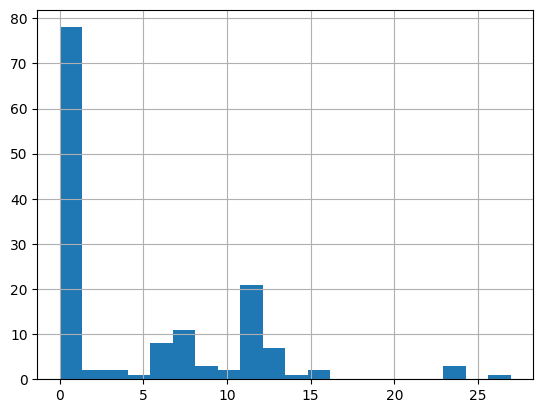

In [4]:
nan_value_X_data_team_home=calculate_nan_percentage(X_data_team_home)
nan_value_X_data_team_home.hist(bins=20)
nan_value_X_data_team_home

##### No need to drop a column neither in the train nor in the test

In [5]:
X_data_team_home_filled=X_data_team_home.fillna(0)
X_data_team_home_filled_test=X_data_team_home_test.fillna(0)

In [6]:
X_data_team_home_filled

,LEAGUE,TEAM_NAME,TEAM_SHOTS_TOTAL_season_sum,TEAM_SHOTS_INSIDEBOX_season_sum,TEAM_SHOTS_OFF_TARGET_season_sum,TEAM_SHOTS_ON_TARGET_season_sum,TEAM_SHOTS_OUTSIDEBOX_season_sum,TEAM_PASSES_season_sum,TEAM_SUCCESSFUL_PASSES_season_sum,TEAM_SAVES_season_sum,TEAM_CORNERS_season_sum,TEAM_FOULS_season_sum,TEAM_YELLOWCARDS_season_sum,TEAM_REDCARDS_season_sum,TEAM_OFFSIDES_season_sum,TEAM_ATTACKS_season_sum,TEAM_PENALTIES_season_sum,TEAM_SUBSTITUTIONS_season_sum,TEAM_BALL_SAFE_season_sum,TEAM_DANGEROUS_ATTACKS_season_sum,TEAM_INJURIES_season_sum,TEAM_GOALS_season_sum,TEAM_GAME_WON_season_sum,TEAM_GAME_DRAW_season_sum,TEAM_GAME_LOST_season_sum,TEAM_SHOTS_TOTAL_season_average,TEAM_SHOTS_INSIDEBOX_season_average,TEAM_SHOTS_OFF_TARGET_season_average,TEAM_SHOTS_ON_TARGET_season_average,TEAM_SHOTS_OUTSIDEBOX_season_average,TEAM_PASSES_season_average,TEAM_SUCCESSFUL_PASSES_season_average,TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_average,TEAM_SAVES_season_average,TEAM_CORNERS_season_average,TEAM_BALL_POSSESSION_season_average,TEAM_FOULS_season_average,TEAM_YELLOWCARDS_season_average,TEAM_REDCARDS_season_average,TEAM_OFFSIDES_season_average,TEAM_ATTACKS_season_average,TEAM_PENALTIES_season_average,TEAM_SUBSTITUTIONS_season_average,TEAM_BALL_SAFE_season_average,TEAM_DANGEROUS_ATTACKS_season_average,TEAM_INJURIES_season_average,TEAM_GOALS_season_average,TEAM_GAME_WON_season_average,TEAM_GAME_DRAW_season_average,TEAM_GAME_LOST_season_average,TEAM_SHOTS_TOTAL_season_std,TEAM_SHOTS_INSIDEBOX_season_std,TEAM_SHOTS_OFF_TARGET_season_std,TEAM_SHOTS_ON_TARGET_season_std,TEAM_SHOTS_OUTSIDEBOX_season_std,TEAM_PASSES_season_std,TEAM_SUCCESSFUL_PASSES_season_std,TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_std,TEAM_SAVES_season_std,TEAM_CORNERS_season_std,TEAM_BALL_POSSESSION_season_std,TEAM_FOULS_season_std,TEAM_YELLOWCARDS_season_std,TEAM_REDCARDS_season_std,TEAM_OFFSIDES_season_std,TEAM_ATTACKS_season_std,TEAM_PENALTIES_season_std,TEAM_SUBSTITUTIONS_season_std,TEAM_BALL_SAFE_season_std,TEAM_DANGEROUS_ATTACKS_season_std,TEAM_INJURIES_season_std,TEAM_GOALS_season_std,TEAM_SHOTS_TOTAL_5_last_match_sum,TEAM_SHOTS_INSIDEBOX_5_last_match_sum,TEAM_SHOTS_OFF_TARGET_5_last_match_sum,TEAM_SHOTS_ON_TARGET_5_last_match_sum,TEAM_SHOTS_OUTSIDEBOX_5_last_match_sum,TEAM_PASSES_5_last_match_sum,TEAM_SUCCESSFUL_PASSES_5_last_match_sum,TEAM_SAVES_5_last_match_sum,TEAM_CORNERS_5_last_match_sum,TEAM_FOULS_5_last_match_sum,TEAM_YELLOWCARDS_5_last_match_sum,TEAM_REDCARDS_5_last_match_sum,TEAM_OFFSIDES_5_last_match_sum,TEAM_ATTACKS_5_last_match_sum,TEAM_PENALTIES_5_last_match_sum,TEAM_SUBSTITUTIONS_5_last_match_sum,TEAM_BALL_SAFE_5_last_match_sum,TEAM_DANGEROUS_ATTACKS_5_last_match_sum,TEAM_INJURIES_5_last_match_sum,TEAM_GOALS_5_last_match_sum,TEAM_GAME_WON_5_last_match_sum,TEAM_GAME_DRAW_5_last_match_sum,TEAM_GAME_LOST_5_last_match_sum,TEAM_SHOTS_TOTAL_5_last_match_average,TEAM_SHOTS_INSIDEBOX_5_last_match_average,TEAM_SHOTS_OFF_TARGET_5_last_match_average,TEAM_SHOTS_ON_TARGET_5_last_match_average,TEAM_SHOTS_OUTSIDEBOX_5_last_match_average,TEAM_PASSES_5_last_match_average,TEAM_SUCCESSFUL_PASSES_5_last_match_average,TEAM_SUCCESSFUL_PASSES_PERCENTAGE_5_last_match_average,TEAM_SAVES_5_last_match_average,TEAM_CORNERS_5_last_match_average,TEAM_BALL_POSSESSION_5_last_match_average,TEAM_FOULS_5_last_match_average,TEAM_YELLOWCARDS_5_last_match_average,TEAM_REDCARDS_5_last_match_average,TEAM_OFFSIDES_5_last_match_average,TEAM_ATTACKS_5_last_match_average,TEAM_PENALTIES_5_last_match_average,TEAM_SUBSTITUTIONS_5_last_match_average,TEAM_BALL_SAFE_5_last_match_average,TEAM_DANGEROUS_ATTACKS_5_last_match_average,TEAM_INJURIES_5_last_match_average,TEAM_GOALS_5_last_match_average,TEAM_GAME_WON_5_last_match_average,TEAM_GAME_DRAW_5_last_match_average,TEAM_GAME_LOST_5_last_match_average,TEAM_SHOTS_TOTAL_5_last_match_std,TEAM_SHOTS_INSIDEBOX_5_last_match_std,TEAM_SHOTS_OFF_TARGET_5_last_match_std,TEAM_SHOTS_ON_TARGET_5_last_match_std,TEAM_SHOTS_OUTSIDEBOX_5_last_match_std,TEAM_PASSES_5_last_match_st

In [7]:
sum_columns=[col for col in X_data_team_home_filled.columns if 'sum' in col]
std_columns=[col for col in X_data_team_home_filled.columns if 'std' in col]
avg_columns=[col for col in X_data_team_home_filled.columns if 'average' in col]

In [8]:
corr_matrix = X_data_team_home_filled.drop(columns=['LEAGUE','TEAM_NAME']).corr()

In [9]:
corr_matrix

,TEAM_SHOTS_TOTAL_season_sum,TEAM_SHOTS_INSIDEBOX_season_sum,TEAM_SHOTS_OFF_TARGET_season_sum,TEAM_SHOTS_ON_TARGET_season_sum,TEAM_SHOTS_OUTSIDEBOX_season_sum,TEAM_PASSES_season_sum,TEAM_SUCCESSFUL_PASSES_season_sum,TEAM_SAVES_season_sum,TEAM_CORNERS_season_sum,TEAM_FOULS_season_sum,TEAM_YELLOWCARDS_season_sum,TEAM_REDCARDS_season_sum,TEAM_OFFSIDES_season_sum,TEAM_ATTACKS_season_sum,TEAM_PENALTIES_season_sum,TEAM_SUBSTITUTIONS_season_sum,TEAM_BALL_SAFE_season_sum,TEAM_DANGEROUS_ATTACKS_season_sum,TEAM_INJURIES_season_sum,TEAM_GOALS_season_sum,TEAM_GAME_WON_season_sum,TEAM_GAME_DRAW_season_sum,TEAM_GAME_LOST_season_sum,TEAM_SHOTS_TOTAL_season_average,TEAM_SHOTS_INSIDEBOX_season_average,TEAM_SHOTS_OFF_TARGET_season_average,TEAM_SHOTS_ON_TARGET_season_average,TEAM_SHOTS_OUTSIDEBOX_season_average,TEAM_PASSES_season_average,TEAM_SUCCESSFUL_PASSES_season_average,TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_average,TEAM_SAVES_season_average,TEAM_CORNERS_season_average,TEAM_BALL_POSSESSION_season_average,TEAM_FOULS_season_average,TEAM_YELLOWCARDS_season_average,TEAM_REDCARDS_season_average,TEAM_OFFSIDES_season_average,TEAM_ATTACKS_season_average,TEAM_PENALTIES_season_average,TEAM_SUBSTITUTIONS_season_average,TEAM_BALL_SAFE_season_average,TEAM_DANGEROUS_ATTACKS_season_average,TEAM_INJURIES_season_average,TEAM_GOALS_season_average,TEAM_GAME_WON_season_average,TEAM_GAME_DRAW_season_average,TEAM_GAME_LOST_season_average,TEAM_SHOTS_TOTAL_season_std,TEAM_SHOTS_INSIDEBOX_season_std,TEAM_SHOTS_OFF_TARGET_season_std,TEAM_SHOTS_ON_TARGET_season_std,TEAM_SHOTS_OUTSIDEBOX_season_std,TEAM_PASSES_season_std,TEAM_SUCCESSFUL_PASSES_season_std,TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_std,TEAM_SAVES_season_std,TEAM_CORNERS_season_std,TEAM_BALL_POSSESSION_season_std,TEAM_FOULS_season_std,TEAM_YELLOWCARDS_season_std,TEAM_REDCARDS_season_std,TEAM_OFFSIDES_season_std,TEAM_ATTACKS_season_std,TEAM_PENALTIES_season_std,TEAM_SUBSTITUTIONS_season_std,TEAM_BALL_SAFE_season_std,TEAM_DANGEROUS_ATTACKS_season_std,TEAM_INJURIES_season_std,TEAM_GOALS_season_std,TEAM_SHOTS_TOTAL_5_last_match_sum,TEAM_SHOTS_INSIDEBOX_5_last_match_sum,TEAM_SHOTS_OFF_TARGET_5_last_match_sum,TEAM_SHOTS_ON_TARGET_5_last_match_sum,TEAM_SHOTS_OUTSIDEBOX_5_last_match_sum,TEAM_PASSES_5_last_match_sum,TEAM_SUCCESSFUL_PASSES_5_last_match_sum,TEAM_SAVES_5_last_match_sum,TEAM_CORNERS_5_last_match_sum,TEAM_FOULS_5_last_match_sum,TEAM_YELLOWCARDS_5_last_match_sum,TEAM_REDCARDS_5_last_match_sum,TEAM_OFFSIDES_5_last_match_sum,TEAM_ATTACKS_5_last_match_sum,TEAM_PENALTIES_5_last_match_sum,TEAM_SUBSTITUTIONS_5_last_match_sum,TEAM_BALL_SAFE_5_last_match_sum,TEAM_DANGEROUS_ATTACKS_5_last_match_sum,TEAM_INJURIES_5_last_match_sum,TEAM_GOALS_5_last_match_sum,TEAM_GAME_WON_5_last_match_sum,TEAM_GAME_DRAW_5_last_match_sum,TEAM_GAME_LOST_5_last_match_sum,TEAM_SHOTS_TOTAL_5_last_match_average,TEAM_SHOTS_INSIDEBOX_5_last_match_average,TEAM_SHOTS_OFF_TARGET_5_last_match_average,TEAM_SHOTS_ON_TARGET_5_last_match_average,TEAM_SHOTS_OUTSIDEBOX_5_last_match_average,TEAM_PASSES_5_last_match_average,TEAM_SUCCESSFUL_PASSES_5_last_match_average,TEAM_SUCCESSFUL_PASSES_PERCENTAGE_5_last_match_average,TEAM_SAVES_5_last_match_average,TEAM_CORNERS_5_last_match_average,TEAM_BALL_POSSESSION_5_last_match_average,TEAM_FOULS_5_last_match_average,TEAM_YELLOWCARDS_5_last_match_average,TEAM_REDCARDS_5_last_match_average,TEAM_OFFSIDES_5_last_match_average,TEAM_ATTACKS_5_last_match_average,TEAM_PENALTIES_5_last_match_average,TEAM_SUBSTITUTIONS_5_last_match_average,TEAM_BALL_SAFE_5_last_match_average,TEAM_DANGEROUS_ATTACKS_5_last_match_average,TEAM_INJURIES_5_last_match_average,TEAM_GOALS_5_last_match_average,TEAM_GAME_WON_5_last_match_average,TEAM_GAME_DRAW_5_last_match_average,TEAM_GAME_LOST_5_last_match_average,TEAM_SHOTS_TOTAL_5_last_match_std,TEAM_SHOTS_INSIDEBOX_5_last_match_std,TEAM_SHOTS_OFF_TARGET_5_last_match_std,TEAM_SHOTS_ON_TARGET_5_last_match_std,TEAM_SHOTS_OUTSIDEBOX_5_last_match_std,TEAM_PASSES_5_last_match_std,TEAM_SUCCESSFUL

In [35]:
correlated_columns = set()

# Iterate through the correlation matrix
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.9:  # Check if correlation is higher than 0.9
            colname_i = corr_matrix.columns[i]  # Get the name of the column
            colname_j = corr_matrix.columns[j]
            if 'average' in colname_i and 'average' not in colname_j:
                correlated_columns.add(colname_j)
            elif 'average' in colname_j and 'average' not in colname_i:
                correlated_columns.add(colname_i)
            else:
                correlated_columns.add(colname_j)

In [36]:
X_data_team_home_filled_nocorr=X_data_team_home_filled.drop(columns=list(correlated_columns))
X_data_team_home_filled_nocorr_test=X_data_team_home_filled_test.drop(columns=list(correlated_columns))

In [37]:
sum_columns=[col for col in X_data_team_home_filled_nocorr.columns if 'sum' in col]
std_columns=[col for col in X_data_team_home_filled_nocorr.columns if 'std' in col]
avg_columns=[col for col in X_data_team_home_filled_nocorr.columns if 'average' in col]

In [41]:
radical_avg=[col.rsplit('_',1)[0] for col in avg_columns]
radical_sum=[col.rsplit('_',1)[0] for col in sum_columns]
radical_std=[col.rsplit('_',1)[0] for col in std_columns]

In [42]:
col_radical_to_drop=[]

In [43]:
for col in sum_columns+std_columns:
    col_radical=col.rsplit('_',1)[0]
    if col_radical in radical_avg:
        col_radical_to_drop.append(col)

In [45]:
X_data_team_home_filled_nocorr_test_avg=X_data_team_home_filled_nocorr_test.drop(columns=sum_columns+std_columns,axis=1) 


In [46]:
X_data_team_home_filled_nocorr_avg=X_data_team_home_filled_nocorr.drop(columns=sum_columns+std_columns)


In [47]:
X_data_team_home_filled_nocorr_avg.to_csv('X_data_team_home_preproc.csv',index='ID')

In [48]:
X_data_team_home_filled_nocorr_test_avg.to_csv('X_data_team_home_test_preproc.csv',index='ID')